# Investigating TMDB dataset

## Introduction
TMDB dataset is a dataset that contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

The columns selected for the context of this report are: “id”, “popularity”,“budget”,“revenue”,“cast”,“genres”

## Data Wrangling

### General Properties

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
df = pd.read_csv('./tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Remove unnecessary columns

In [7]:
df.drop(['imdb_id', 'homepage','director','overview','tagline','keywords',
         'budget_adj','revenue_adj','production_companies','original_title', 'release_date'],
        axis=1, inplace=True)
df.head()

,id,popularity,budget,revenue,cast,runtime,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2947,7.3,2015


### Remove rows with null values

In [8]:
df.isna().sum()

id               0
popularity       0
budget           0
revenue          0
cast            76
runtime          0
genres          23
vote_count       0
vote_average     0
release_year     0
dtype: int64

In [9]:
df.dropna(inplace=True)
df.isna().sum()

id              0
popularity      0
budget          0
revenue         0
cast            0
runtime         0
genres          0
vote_count      0
vote_average    0
release_year    0
dtype: int64

In [10]:
df.shape

(10768, 10)

### Remove duplicates

In [11]:
df.drop_duplicates(inplace=True)
df.shape

(10767, 10)

### Fixing the genres column
The genres column contains the genres of each movie seperated with "|". To make it easier to work with, the genres cell in each row will be transformed to be a list with genres names then it will be spreaded over multiple rows with on genre per row for each movie in another dataframe

Change the genres field to an array:

In [12]:
df['genres'] = df['genres'].apply(lambda x: x.split('|'))

In [13]:
df.head(1)

,id,popularity,budget,revenue,cast,runtime,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,2015


In [14]:
genres_df = pd.DataFrame(df['genres'].tolist(), index=df['id']).stack()
genres_df = genres_df.reset_index([0, 'id'])
genres_df.columns=['id','genres']
genres_df.head()

,id,genres
0,135397,Action
1,135397,Adventure
2,135397,Science Fiction
3,135397,Thriller
4,76341,Action


In [15]:
df_copy = df.copy()
df_copy.drop(['genres'], axis=1, inplace=True)
genres_df = pd.merge(df_copy, genres_df, how='inner', left_on='id', right_on='id')
genres_df.head()

,id,popularity,budget,revenue,cast,runtime,vote_count,vote_average,release_year,genres
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,5562,6.5,2015,Action
1,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,5562,6.5,2015,Adventure
2,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,5562,6.5,2015,Science Fiction
3,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,5562,6.5,2015,Thriller
4,76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,6185,7.1,2015,Action


### Fixing the cast column
The same process on the genres will be applied on the cast

In [16]:
df['cast'] = df['cast'].apply(lambda x: x.split('|'))
df.head(1)

,id,popularity,budget,revenue,cast,runtime,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",124,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,2015


In [17]:
cast_df = pd.DataFrame(df['cast'].tolist(), index=df['id']).stack()
cast_df = cast_df.reset_index([0, 'id'])
cast_df.columns=['id','cast']
cast_df.head()

,id,cast
0,135397,Chris Pratt
1,135397,Bryce Dallas Howard
2,135397,Irrfan Khan
3,135397,Vincent D'Onofrio
4,135397,Nick Robinson


In [18]:
df_copy = df.copy()
df_copy.drop(['cast'], axis=1, inplace=True)
cast_df = pd.merge(df_copy, cast_df, how='inner', left_on='id', right_on='id')
cast_df.head()

,id,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year,cast
0,135397,32.985763,150000000,1513528810,124,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,2015,Chris Pratt
1,135397,32.985763,150000000,1513528810,124,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,2015,Bryce Dallas Howard
2,135397,32.985763,150000000,1513528810,124,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,2015,Irrfan Khan
3,135397,32.985763,150000000,1513528810,124,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,2015,Vincent D'Onofrio
4,135397,32.985763,150000000,1513528810,124,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,2015,Nick Robinson


Each of the cast and genres dataframes are saved seperatly away from the main dataframe to not influence the result by the duplications in the other columns

# EDA
Time to ask questions, find concolusions, and have some fun!

### 1. What are the most used genres in movies?

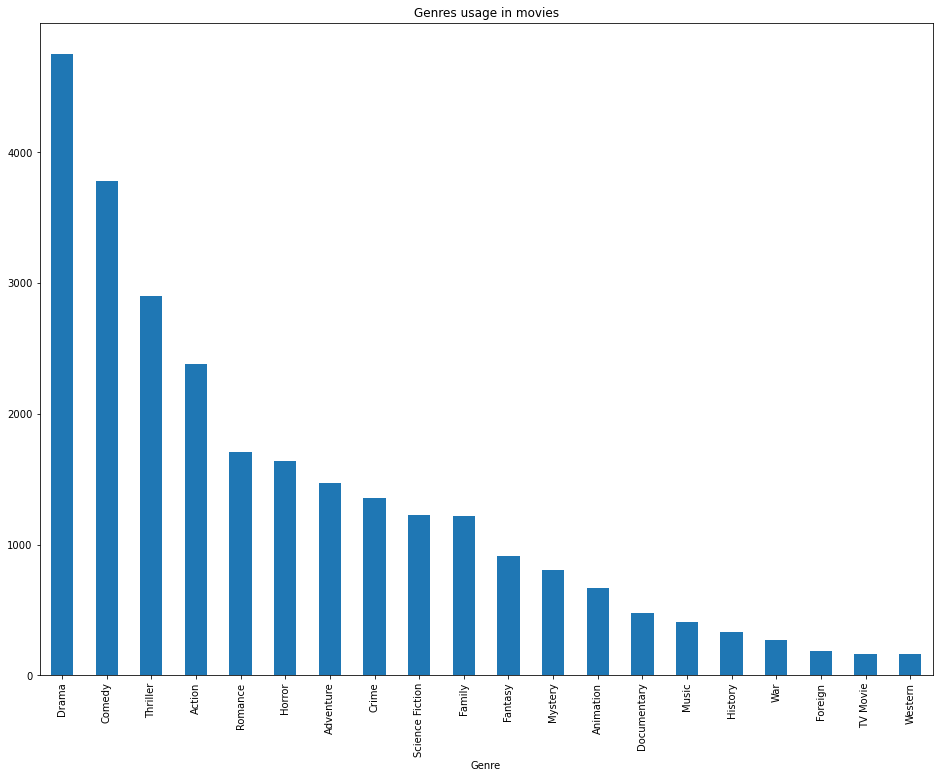

In [19]:
genres_df['genres'].value_counts().plot(kind='bar', figsize=(16,12))
plt.title('Genres usage in movies')
plt.xlabel('Genre')
plt.show()

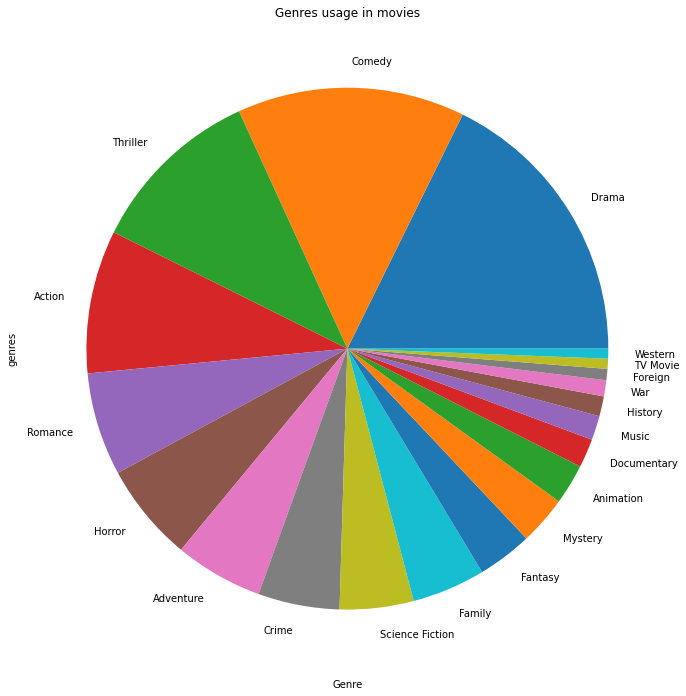

In [20]:
genres_df['genres'].value_counts().plot(kind='pie', figsize=(16,12))
plt.title('Genres usage in movies')
plt.xlabel('Genre')
plt.show()

The most used genres are Drama, Comedy, Thriller, and Action. While TV movie, War, Western, and Foreign, and other genres are lightly produced.

### 2. What is the average movie budget for each genre?

In [21]:
avg_budget = genres_df.groupby('genres').mean()['budget']

# round the numbers
avg_budget = avg_budget.apply(lambda x: round(x))

# sort the values
avg_budget = avg_budget.sort_values(ascending=False)
avg_budget.head()

genres
Adventure          37594809
Fantasy            32791579
Action             27762757
Science Fiction    25013386
Animation          24194674
Name: budget, dtype: int64

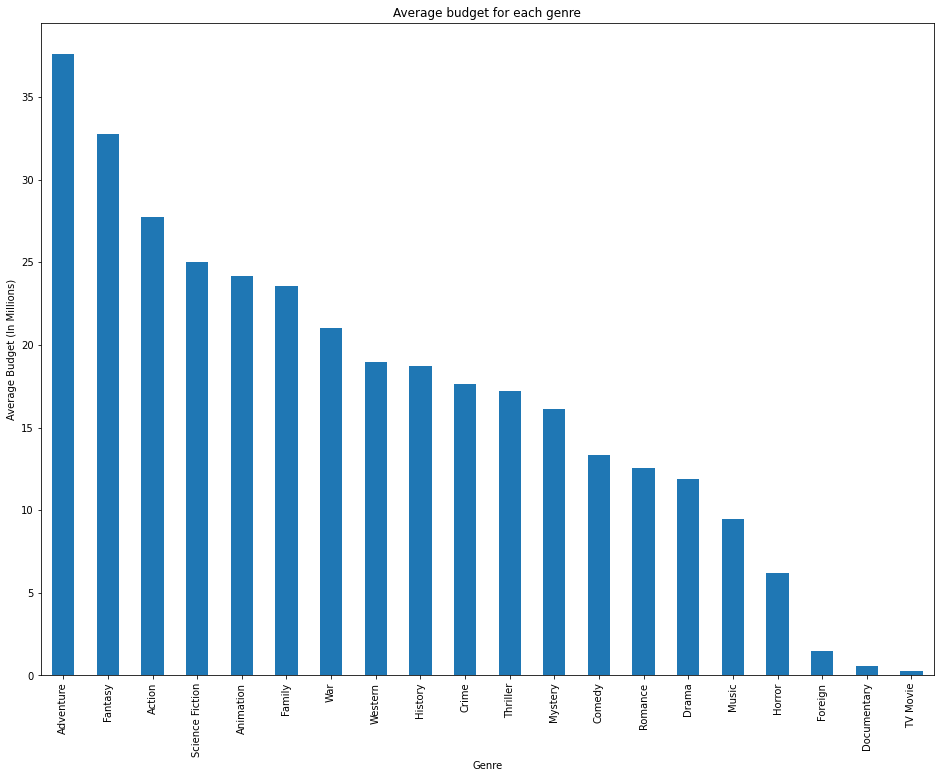

In [22]:
avg_budget.plot(kind='bar', figsize=(16,12))
plt.title('Average budget for each genre')

ax=plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{0:g}'.format(x/1e6)))

plt.xlabel('Genre')
plt.ylabel('Average Budget (In Millions)')
plt.show()

The most expensive genres are Adventure, Fantasy, Family, History, and Science Fiction. While TV Movie, Foreign, Documentary movies are the least expensive.

### 3. What is the average movie revenue for each genre?

In [23]:
avg_revenue = genres_df.groupby('genres').mean()['revenue']

# round the numbers
avg_revenue = avg_revenue.apply(lambda x: round(x))

# sort the values
avg_revenue = avg_revenue.sort_values(ascending=False)
avg_revenue.head()

genres
Adventure    113291895
Fantasy       96842272
Animation     78630774
Family        73146218
Action        72886452
Name: revenue, dtype: int64

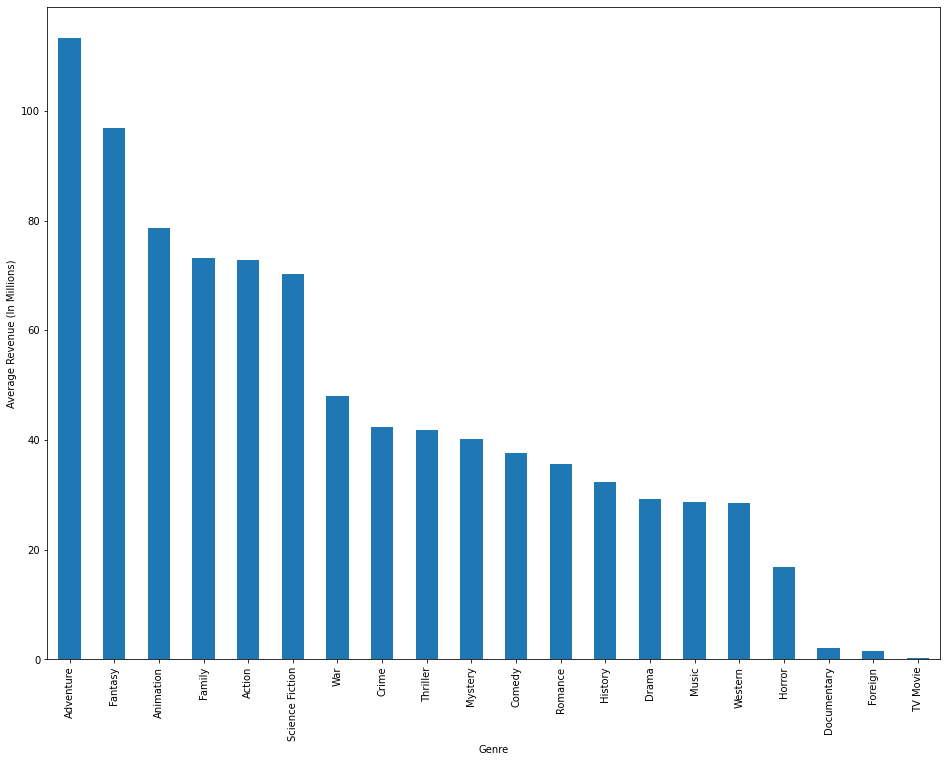

In [31]:
avg_revenue.plot(kind='bar', figsize=(16,12))

ax=plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{0:g}'.format(x/1e6)))

plt.xlabel('Genre')
plt.ylabel('Average Revenue (In Millions)')
plt.show()

The genres that generates highest revenues are Adventure, Action, Fantasy, and Family. While Documentary movies don’t generate much of a revenue.

### 4. Does the budget influence the revenue?

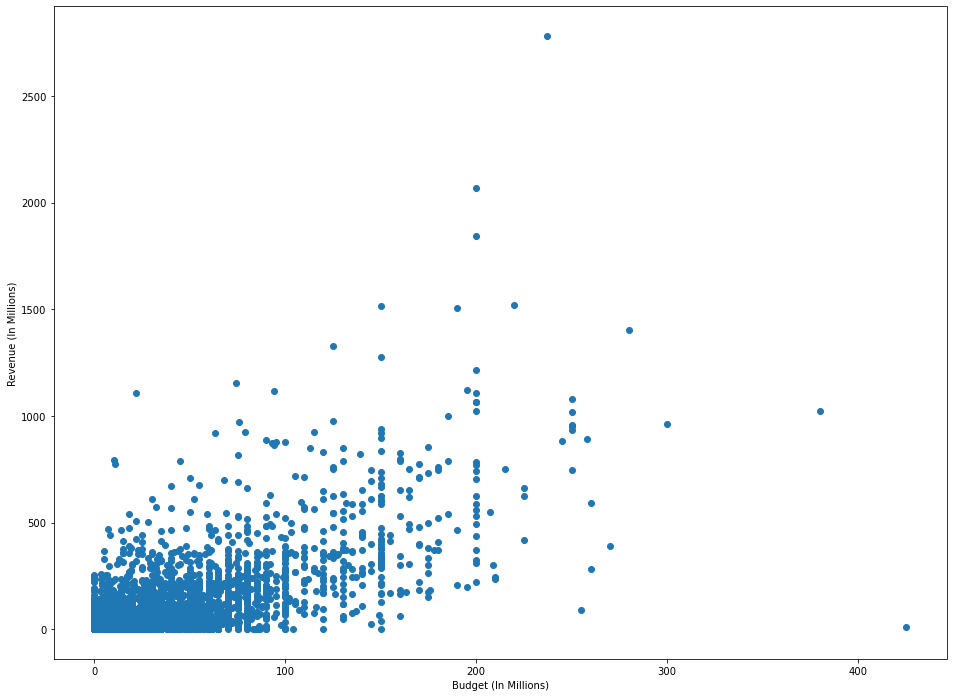

In [32]:
plt.figure(figsize=(16,12))
plt.scatter(df['budget'], df['revenue'])
plt.xlabel('Budget (In Millions)')
plt.ylabel('Revenue (In Millions)')

ax=plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{0:g}'.format(x/1e6)))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{0:g}'.format(x/1e6)))

plt.show()

It appears that there is a very low positive correlation between the budget spent and the revenue gained. In other words, budget doesn't have that large influence on the revenue.

### 5. Does the budget spent influence the popularity?

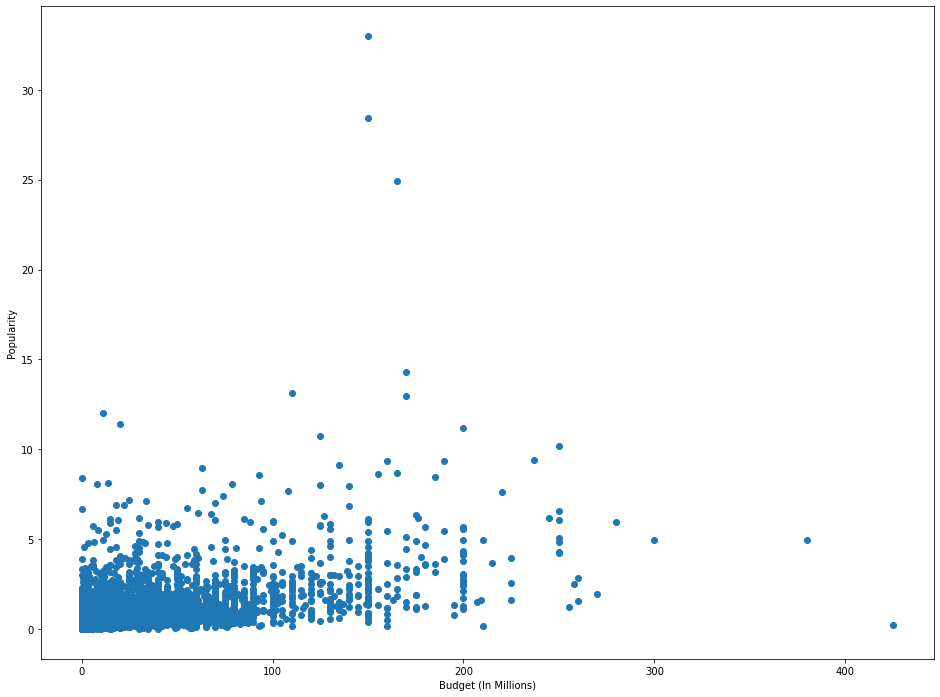

In [34]:
plt.figure(figsize=(16,12))
plt.scatter(df['budget'], df['popularity'])

plt.xlabel('Budget (In Millions)')
plt.ylabel('Popularity')

ax=plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{0:g}'.format(x/1e6)))

plt.show()

Again, although the budget spent have small influence on the popularity, it still not a large influence to consider.

### 6. How the cast influence the revenue

In [27]:
avg_cast_revenue = cast_df.groupby('cast').mean()['revenue']

# round the numbers
avg_cast_revenue = avg_cast_revenue.apply(lambda x: round(x))

# sort the values
avg_cast_revenue = avg_cast_revenue.sort_values(ascending=False)
avg_cast_revenue.head()

cast
Daisy Ridley          2068178225
Santino Fontana       1274219009
Bob Peck               920100000
Robert MacNaughton     792910554
Rosemary Harris        783766341
Name: revenue, dtype: int64

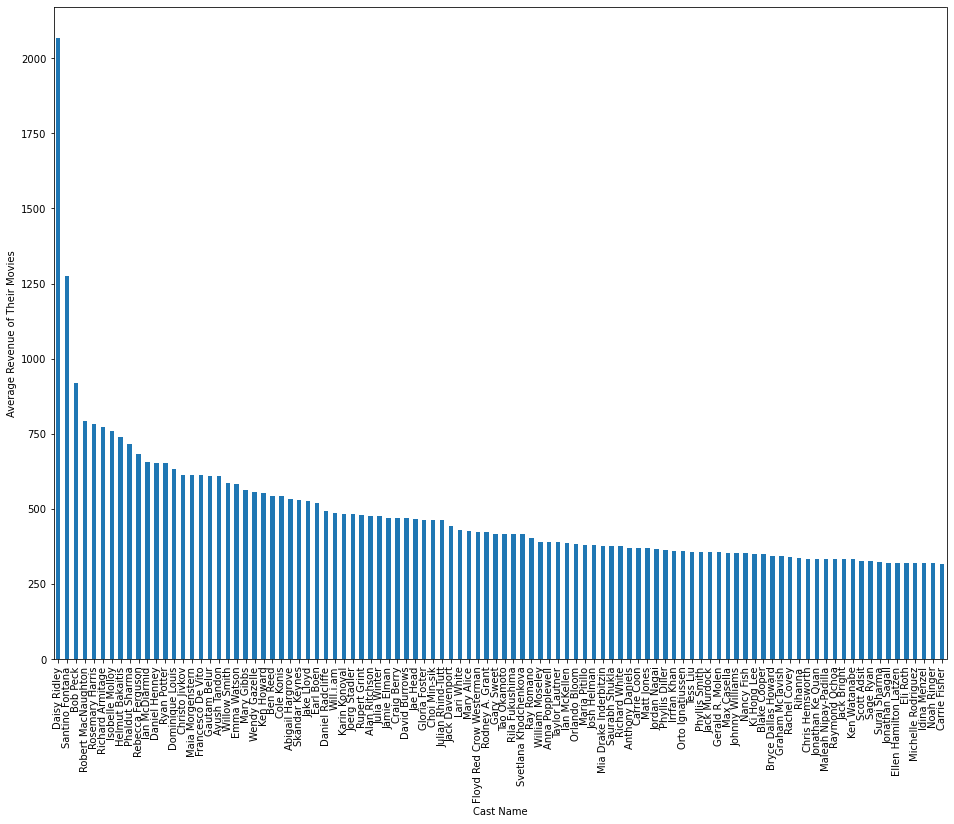

In [35]:
avg_cast_revenue[:100].plot(kind='bar', figsize=(16,12))

ax=plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{0:g}'.format(x/1e6)))

plt.xlabel("Cast Name")
plt.ylabel('Average Revenue of Their Movies')

plt.show()

Cast members rarly have effect on the revenue of the movies they participate in. Daisy Ridley had the highest effect on the revenue of the movies she participated in while other cast members had similary effect on the movies they participate in.


## Conclusions

* The most used genres are Drama, Comedy, Thriller, and Action with the Drama on top. People tend to be "Drama" queens
* The highest budget spent on Adventure, Fantasy, Family, and History.
* The highest reveneue making genres are are the ones most produced. That didn't need a data analyst to find out.
* Budget spent has low influence on both revenues on populariy. Money doesn't buy everything after all. At least not the popularity of the movies.
* Cast members has no influence on the revenues. It turned out to be just a myth.